Create a ML model using Linear Regression. Predict the salary based on years of work experience



In [1]:
# Importing necessary libraries

import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns            # For advanced visualizations

from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression      # For linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation


Load and Explore Dataset

In [2]:
# Loading the dataset

df = pd.read_csv('years_experience_salary_data.csv')

# Display the first few rows of the dataset
df.head()


,Years Experience,Salary
0,8.923418,68457.238592
1,14.686165,96676.237190
2,1.002173,20671.719051
3,6.744319,53391.391139
4,3.788362,29676.255422


In [3]:
# Checking for missing (null) values in the dataset

df.isnull().sum()


,0
Years Experience,0
Salary,0


In [4]:
# Generating descriptive statistics of the dataset

df.describe()


,Years Experience,Salary
count,500.000000,500.000000
mean,10.657265,78685.336424
std,5.639715,30318.538820
min,1.002173,13040.880280
25%,5.738532,53805.984234
50%,11.134777,81239.241692
75%,15.577146,102400.642909
max,19.949134,142565.548669


Exploratory Data Analysis (EDA)

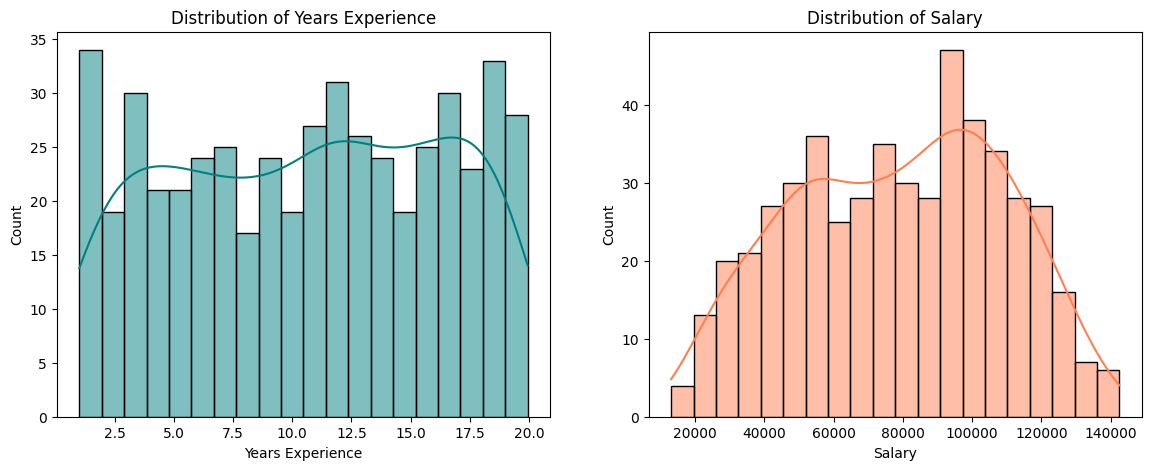

In [6]:
# Visualizing the data distribution

plt.figure(figsize=(14, 5))

# Distribution plot for 'Years Experience'
plt.subplot(1, 2, 1)
sns.histplot(df['Years Experience'], kde=True, bins=20, color='teal')
plt.title('Distribution of Years Experience')

# Distribution plot for 'Salary'
plt.subplot(1, 2, 2)
sns.histplot(df['Salary'], kde=True, bins=20, color='coral')
plt.title('Distribution of Salary')

plt.show()


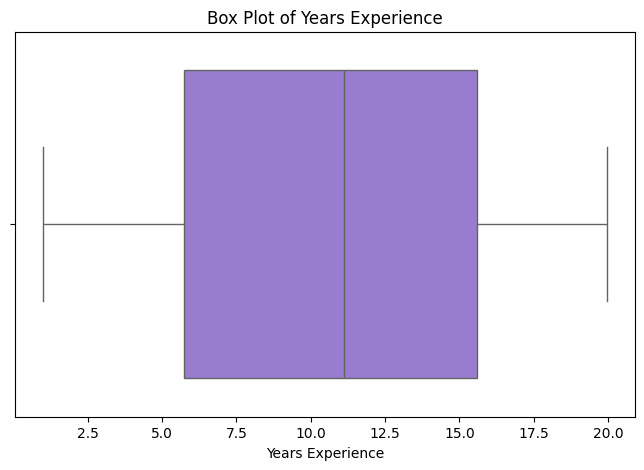

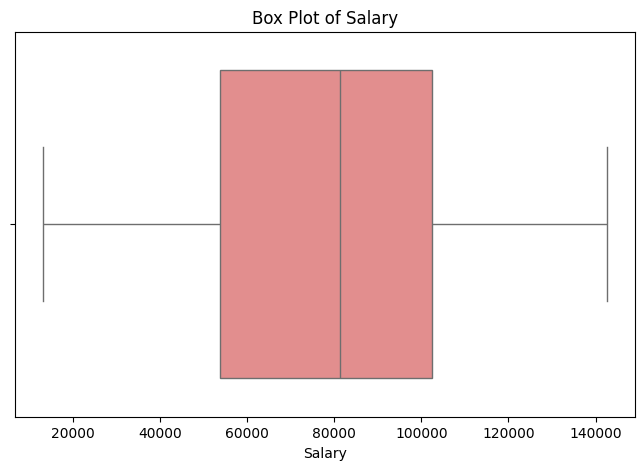

In [7]:
# Box plot for 'Years Experience'

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Years Experience', color='mediumpurple')
plt.title('Box Plot of Years Experience')
plt.show()

# Box plot for 'Salary'

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Salary', color='lightcoral')
plt.title('Box Plot of Salary')
plt.show()


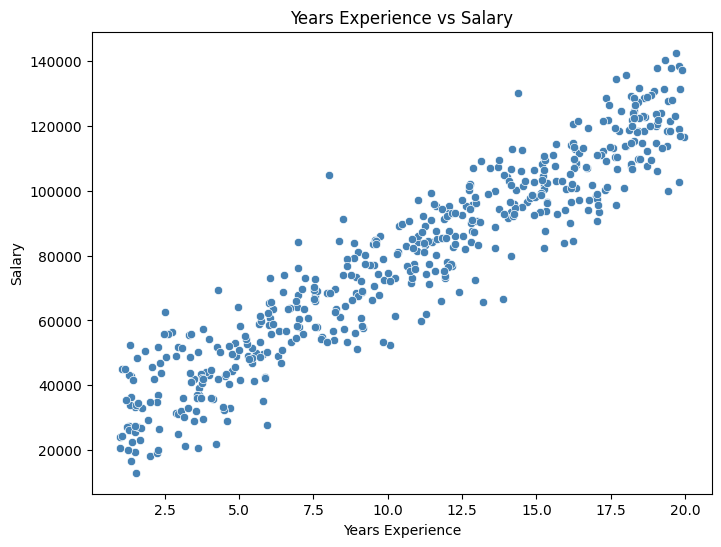

In [8]:
# Scatter plot to visualize the relationship between experience and salary

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Years Experience', y='Salary', data=df, color='steelblue')
plt.title('Years Experience vs Salary')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()



Correlation matrix:
                  Years Experience    Salary
Years Experience          1.000000  0.944266
Salary                    0.944266  1.000000


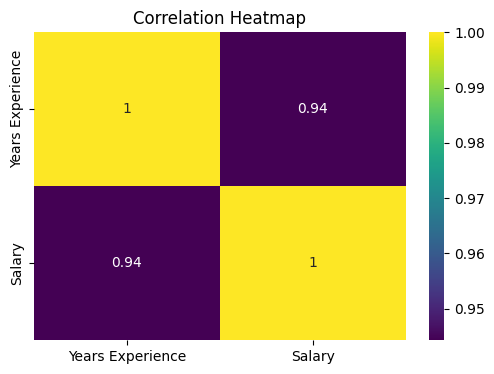

In [9]:
# Correlation between features

correlation = df.corr()
print("\nCorrelation matrix:")
print(correlation)

# Heatmap for correlation

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


Model Building and Training

In [11]:
# Splitting the data into features (X) and target variable (y)

X = df[['Years Experience']]  # Feature
y = df['Salary']              # Target variable


# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
# Creating the Linear Regression model

model = LinearRegression()


# Training the model on the training data

model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Making predictions on the test set

y_pred = model.predict(X_test)


In [15]:
# Evaluating the model

r2 = r2_score(y_test, y_pred)

print(f"R-squared (R²): {r2:.2f}")


R-squared (R²): 0.90


Residual Analysis

In [19]:
# Calculating residuals

residuals = y_test - y_pred


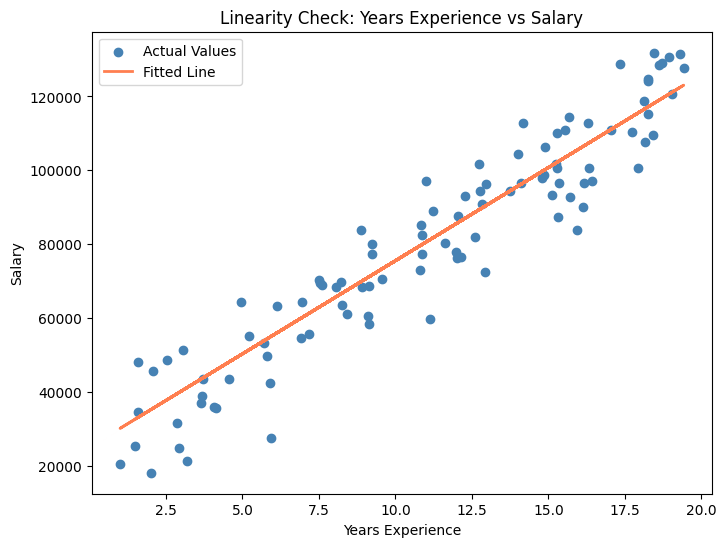

In [16]:
# Scatter plot to check linearity

plt.figure(figsize=(8, 6))

# Actual data points
plt.scatter(X_test, y_test, color='steelblue', label='Actual Values')

# Regression (fitted) line
plt.plot(X_test, y_pred, color='coral', linewidth=2, label='Fitted Line')

plt.title('Linearity Check: Years Experience vs Salary')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


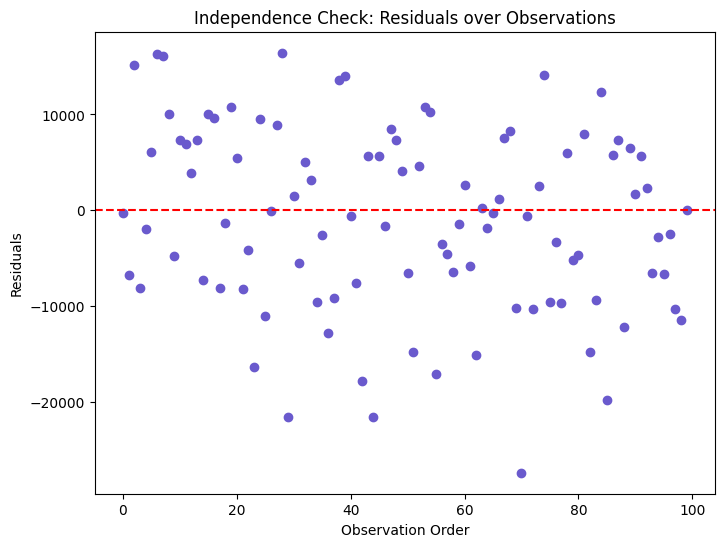

In [20]:
# Calculating residuals
residuals = y_test - y_pred

# Plot residuals over the order of observations to check independence
plt.figure(figsize=(8, 6))
plt.plot(
    range(len(residuals)),
    residuals,
    marker='o',
    linestyle='',
    color='slateblue'
)

plt.axhline(y=0, color='red', linestyle='--')
plt.title('Independence Check: Residuals over Observations')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.show()


The random scatter of residuals across observations indicates independence, meaning the model’s errors are not correlated.

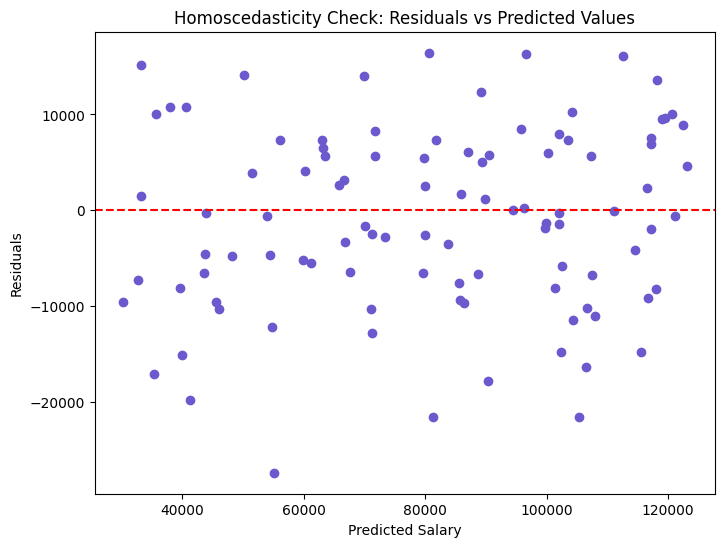

In [21]:
# Plot residuals vs predicted values to check homoscedasticity

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='slateblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homoscedasticity Check: Residuals vs Predicted Values')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.show()


The residuals show constant variance across predicted salaries, indicating stable model performance across compensation levels.

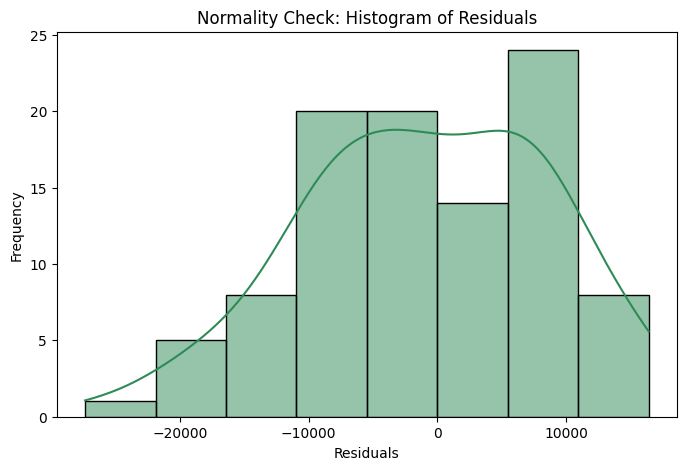

In [22]:
# Histogram of residuals to check normality

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='seagreen')
plt.title('Normality Check: Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


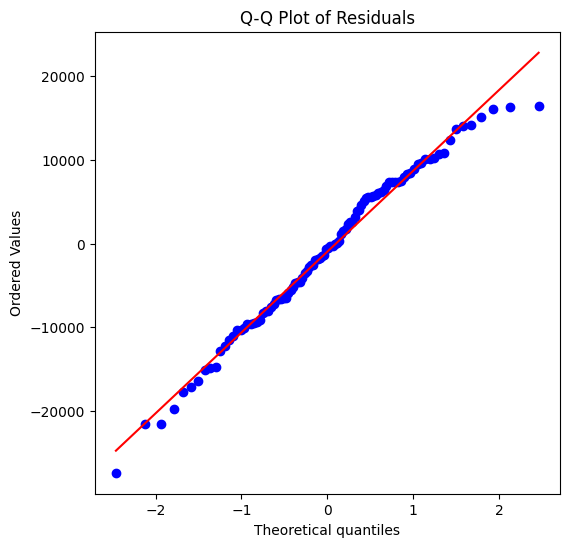

In [23]:
# Q-Q plot to further check for normality

import scipy.stats as stats

fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=ax)
plt.title('Q-Q Plot of Residuals')
plt.show()


Histogram: If the residuals follow a bell-shaped curve, it suggests they are normally distributed.

Q-Q Plot: If the points lie approximately along the straight line, it indicates that the residuals are normally distributed.

Cross-Validation

In [24]:
# Importing cross-validation tools

from sklearn.model_selection import cross_val_score


In [25]:
# Performing 5-fold cross-validation using R-squared

cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring='r2'
)

print("Cross-validation R² scores:", cv_scores)
print("Average Cross-validation R²:", cv_scores.mean())


Cross-validation R² scores: [0.88108588 0.89751305 0.87829744 0.88584035 0.9064089 ]
Average Cross-validation R²: 0.8898291226767435


This chunk evaluates the stability and generalizability of the linear regression model using 5-fold cross-validation. The dataset is divided into five equal subsets, and the model is trained on four subsets while being tested on the remaining one. This process is repeated five times so that each subset is used once as the test set.

The resulting R-squared scores from each fold provide insight into how consistently the model performs across different data splits. The mean cross-validation R-squared score represents the expected performance of the model on unseen data. The close alignment between the cross-validation R-squared and the initial test R-squared indicates that the model generalizes well and is not overfitting.

Overall, this step confirms that years of experience is a reliable predictor of salary and that the model can be confidently used for making fair and data-driven salary predictions for future hires.

In [26]:
# Interactive Salary Prediction using a slider widget

import ipywidgets as widgets
from IPython.display import display

def interactive_prediction(years_exp):
    # Predict salary for the given years of experience
    predicted_salary = model.predict(np.array([[years_exp]]))[0]
    print(f"For {years_exp:.1f} years of experience, the predicted salary is: ${predicted_salary:,.2f}")

# Creating an interactive slider widget
years_exp_widget = widgets.FloatSlider(
    value=5.0,
    min=float(df['Years Experience'].min()),
    max=float(df['Years Experience'].max()),
    step=0.1,
    description='Years Exp:',
    continuous_update=False
)

interactive_widget = widgets.interactive(interactive_prediction, years_exp=years_exp_widget)

print("Interactive Salary Prediction:")
display(interactive_widget)


Interactive Salary Prediction:


interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='Years Exp:', max=19.9491341…